# Лабораторна робота 5
### Студента групи МІТ-31
### Ярощука Назара Юрійовича


In [1]:
import random as rnd

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mplt

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.datasets import fashion_mnist

from sklearn import metrics, datasets, model_selection
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
model = pd.read_csv('./water_potability.csv')

model.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,303.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,323.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
model.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
insurance=pd.get_dummies(model)
insurance.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,303.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,323.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
X = insurance.drop("Solids", axis=1)
y = insurance["Solids"]

print(X.head())
print(y.head())

         ph    Hardness  Chloramines     Sulfate  Conductivity  \
0  1.000000  204.890455     7.300212  368.516441    564.308654   
1  3.716080  129.422921     6.635246  303.000000    592.885359   
2  8.099124  224.236259     9.275884  323.000000    418.606213   
3  8.316766  214.373394     8.059332  356.886136    363.266516   
4  9.092223  181.101509     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
0    20791.318981
1    18630.057858
2    19909.541732
3    22018.417441
4    17978.986339
Name: Solids, dtype: float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

tf.random.set_seed=13

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=Adam(), metrics=['mse'])

X_train.shape

(36, 9)

In [15]:
history = model.fit(X_train, y_train, epochs=10)


Epoch 1/10
2/2 [==============================] - 1s 4ms/step - loss: 594833856.0000 - mse: 594833856.0000
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 594399552.0000 - mse: 594399552.0000
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 593965824.0000 - mse: 593965824.0000
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 593540480.0000 - mse: 593540480.0000
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 593110912.0000 - mse: 593110912.0000
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 592681600.0000 - mse: 592681600.0000
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 592259840.0000 - mse: 592259840.0000
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 591839808.0000 - mse: 591839808.0000
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 591416704.0000 - mse: 591416704.0000
Epoch 10/10
2/2 [====================

In [16]:
history_2 = model.fit(X_train, y_train, epochs=200)

score_1 = model.evaluate(X_test, y_test)

Epoch 1/200
2/2 [==============================] - 0s 4ms/step - loss: 590581120.0000 - mse: 590581120.0000
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 590164864.0000 - mse: 590164864.0000
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 589751744.0000 - mse: 589751744.0000
Epoch 4/200
2/2 [==============================] - 0s 4ms/step - loss: 589335616.0000 - mse: 589335616.0000
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 588915008.0000 - mse: 588915008.0000
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 588496576.0000 - mse: 588496576.0000
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 588085440.0000 - mse: 588085440.0000
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 587664832.0000 - mse: 587664832.0000
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 587246336.0000 - mse: 587246336.0000
Epoch 10/200
2/2 [==========

In [21]:
path = 'model.h5'

model.save(path)

loaded_model= tf.keras.models.load_model(path)

y1 = model.predict(X_test)
y2 = loaded_model.predict(X_test)
print(f'y1: {y1.sum()}')
print(f'y2: {y2.sum()}')
print(f'y1 - y2: {(y1 - y2).sum()}')

y1: 49112.69921875
y2: 49112.69921875
y1 - y2: 0.0


In [44]:
transformer = make_column_transformer(
    (MinMaxScaler(),["Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes"]), 
    (OneHotEncoder(handle_unknown="ignore"),['Turbidity','Potability'])
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

transformer.fit(X_train)

X_train_norm = transformer.transform(X_train).astype(np.float32).toarray()
print(type(X_train_norm))
X_test_norm = transformer.transform(X_test).astype(np.float32).toarray()
print(type(X_test_norm))

model_2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
model_2.compile(loss='mse', optimizer=Adam(), metrics=['mse', 'mae'])

history_model_2 = model_2.fit(X_train_norm, y_train, validation_split=0.3, epochs=30, verbose=0)

model_2.evaluate(X_test_norm, y_test)

X_train.shape

1/1 [==============================] - 0s 44ms/step - loss: 646361984.0000 - mse: 646361984.0000 - mae: 23040.0742


(36, 9)

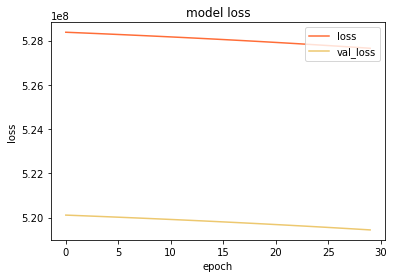

In [47]:
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [48]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [49]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [50]:
train_data[0].shape, train_labels[0].shape


((28, 28), ())

In [51]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [52]:
model.layers

In [53]:
weights, biases = model.layers[1].get_weights()

weights, weights.shape

(array([[-0.9634318 ],
        [-0.5985635 ],
        [-0.69924986],
        [-1.1980811 ],
        [-0.9001054 ],
        [-0.6559883 ],
        [-1.023167  ],
        [ 0.9570822 ],
        [-0.22494528],
        [-0.7394023 ]], dtype=float32),
 (10, 1))

In [54]:

biases, biases.shape

(array([0.40602487], dtype=float32), (1,))

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                100       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
